In [11]:
library(lmtest)
suppressWarnings(suppressMessages(library(ResourceSelection)))
source("./codesnippet_r/final_proj_config.R")
source("./codesnippet_r/fun_walds.R")
source("./codesnippet_r/fun_hosmerlem.R")
source("./codesnippet_r/fun_concordance.R")
head(dat_v1)

Parsed with column specification:
cols(
  patient = col_integer(),
  treatment = col_integer(),
  gender = col_integer(),
  age = col_integer(),
  visit1 = col_integer(),
  visit2 = col_integer(),
  visit3 = col_integer(),
  visit4 = col_integer()
)


trt,age,gender,y,n
Placebo,13,Male,4,7
Placebo,13,Female,10,12
Placebo,14,Male,5,7
Placebo,14,Female,4,4
Placebo,15,Male,2,3
Placebo,19,Male,3,6


In [12]:
### initialization
dat = dat_v1

### fit the model
fit_logit = glm(cbind(y, n-y) ~ age + gender, data = dat, family = binomial(link = "logit"), x = T)
summary(fit_logit)


Call:
glm(formula = cbind(y, n - y) ~ age + gender, family = binomial(link = "logit"), 
    data = dat, x = T)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3225  -0.9379   0.3233   0.9459   2.0805  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.27923    0.41526   0.672 0.501313    
age           0.05104    0.01498   3.408 0.000654 ***
genderFemale  0.80035    0.33042   2.422 0.015425 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.638  on 58  degrees of freedom
Residual deviance: 76.930  on 56  degrees of freedom
AIC: 152.53

Number of Fisher Scoring iterations: 5


In [13]:
### n = 1 situation
df = dat_raw %>% select(trt, gender, age, visit1) %>% rename(y = visit1) %>% mutate(n = 1)
dat_v1_n1 = df
head(dat_v1_n1)

### fit the model
fit_logit_n1 = glm(cbind(y, n-y) ~ age + gender, data = dat_v1_n1, family = binomial(link = "logit"), x = T)
summary(fit_logit)

trt,gender,age,y,n
0,0,28,1,1
0,1,19,1,1
0,0,15,0,1
0,0,63,1,1
0,1,35,1,1
0,1,13,1,1



Call:
glm(formula = cbind(y, n - y) ~ age + gender, family = binomial(link = "logit"), 
    data = dat, x = T)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3225  -0.9379   0.3233   0.9459   2.0805  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.27923    0.41526   0.672 0.501313    
age           0.05104    0.01498   3.408 0.000654 ***
genderFemale  0.80035    0.33042   2.422 0.015425 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.638  on 58  degrees of freedom
Residual deviance: 76.930  on 56  degrees of freedom
AIC: 152.53

Number of Fisher Scoring iterations: 5


In [14]:
concordance(fit_logit_n1)

$Concordance
[1] 0.665686

$Discordance
[1] 0.3092151

$Tied
[1] 0.02509898

$Pairs
[1] 27531

$`Somers D`
[1] 0.3564709

$gamma
[1] 0.3656483

$`tau-a`
[1] 0.07866934

$c
Area under the curve: 0.6782

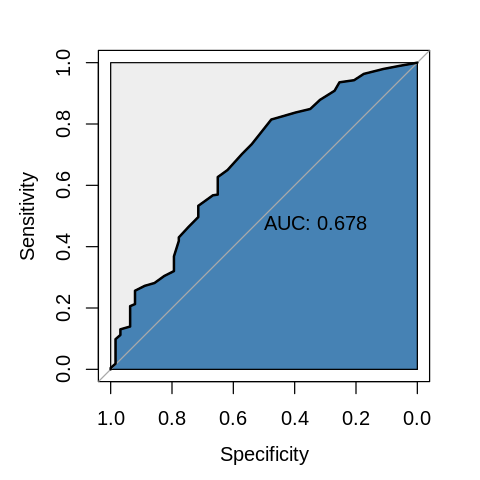

In [17]:
df = data.frame(cbind(fit_logit_n1$y, fit_logit_n1$fitted.values))
colnames(df) = c('obs','fitted')
rocobj = roc(df$obs, df$fitted)

options(repr.plot.height = 4, repr.plot.width = 4)
plot(rocobj, 
     print.auc=TRUE, auc.polygon=TRUE, 
     #grid=c(0.1, 0.2), grid.col=c("grey90", "grey90"), 
     max.auc.polygon=TRUE,
     auc.polygon.col="steelblue",
     print.thres=FALSE)